<a href="https://colab.research.google.com/github/jung-han-lee/Projects/blob/master/EAD_Apple%26Samsung_Airing_JungHan_Lee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Intorduction

Apple and Samsung pay tons of money for airing their products via diverse networks. I want to figure out relationships between the amount of money they spend on airing and many factors such as network, product, time, duration.

# 2. Loading and Exploring Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_apple = pd.read_excel('Airings-Report-Apple.xlsx'
                         , header=1, sheet_name='Brand Campaign Details')
df_samsung = pd.read_excel('Alphonso-Airings-Report-Samsung-20200302.xlsx'
                        , header=1, sheet_name='Brand Campaign Details')

In [ ]:
df_apple.head(3)

,Id,Title,Brand,Product,Category,Network,Network Type,Show,Date,Time,...,Co-Op Product,Duration,EQ Units,Spend ($),Broadcast Year,Broadcast Month,Broadcast Week,Day Of Week,Hour Of Day,TimeZone
0,3310815,Apple Music Bazzi,Apple,Apple Music,Entertainment,MTVU,cable,mtvU Music Block,10/17/2019,9:02:16 PM,...,NaN,30,1.0,1,2019,OCT,42,4,21,US/Eastern
1,3869353,Apple iPhone 11 Pro,Apple,Apple Iphone 11 Pro,Cell Phones,MLB Network,cable,MLB Tonight,10/11/2019,7:55:41 PM,...,NaN,30,1.0,810,2019,OCT,41,5,19,US/Eastern
2,3987819,Verizon With Apple Music,Apple,Apple Music,Entertainment,ESPN Deportes,cable,Fútbol picante,10/07/2019,3:39:04 AM,...,NaN,30,1.0,6,2019,OCT,41,1,3,US/Eastern


In [ ]:
df_samsung.head(3)

,Id,Title,Brand,Product,Category,Network,Network Type,Show,Date,Time,...,Co-Op Product,Duration,EQ Units,Spend ($),Broadcast Year,Broadcast Month,Broadcast Week,Day Of Week,Hour Of Day,TimeZone
0,3873186,"Samsung Galaxy Tab S6 ""Create. Work. Anywhere.""",Samsung,Samsung Galaxy Tab S6,Tablets and E-Readers,MTV - Music Television,cable,Ghosted: Love Gone Missing,10/15/2019,9:15:37 PM,...,NaN,15,0.5,1045,2019,OCT,42,2,21,US/Eastern
1,3987566,"Samsung Galaxy Tab S6 ""Create. Work. Anywhere.""",Samsung,Samsung Galaxy Tab S6,Tablets and E-Readers,VH1,cable,That's My Boy,10/12/2019,2:21:04 AM,...,NaN,30,1.0,586,2019,OCT,41,6,2,US/Eastern
2,3873186,"Samsung Galaxy Tab S6 ""Create. Work. Anywhere.""",Samsung,Samsung Galaxy Tab S6,Tablets and E-Readers,E!,cable,Sex and the City,10/04/2019,2:48:36 AM,...,NaN,15,0.5,178,2019,OCT,40,5,2,US/Eastern


Find Missing Values

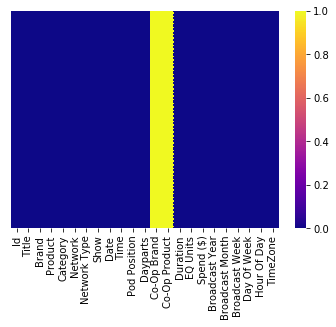

In [ ]:
sns.heatmap(df_apple.isnull(),yticklabels=False, cmap='plasma')

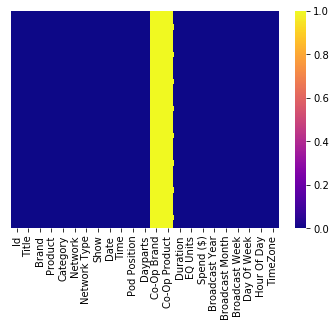

In [ ]:
sns.heatmap(df_samsung.isnull(),yticklabels=False, cmap='plasma')

In [ ]:
# Dropped those columns since all of there values are NaN
df_apple.drop(columns=['Co-Op Brand','Co-Op Product'], inplace=True)
df_samsung.drop(columns=['Co-Op Brand','Co-Op Product'], inplace=True)

In [ ]:
#Dropped columns 'Date' and 'Time' since 'Broadcast Year', 'Broadcast Week', 
# 'Day of Week', and 'Hour od Day' explain them
df_apple.drop(columns=['Date','Time'], inplace=True)
df_samsung.drop(columns=['Date','Time'], inplace=True)

In [ ]:
#Dropped columns 'Brand' and 'Id'.
df_apple.drop(columns=['Brand', 'Id'], inplace=True)
df_samsung.drop(columns=['Brand', 'Id'], inplace=True)

In [ ]:
#Moved column 'Spend ($)' to the end and renamed it as 'cost'
apple_spend = df_apple.pop('Spend ($)') 
samsung_spend = df_samsung.pop('Spend ($)')
df_apple['cost']=apple_spend 
df_samsung['cost']=samsung_spend

In [ ]:
# Changed type of Year, Week, Day, Hour from integer to string.
df_apple[['Broadcast Year', 'Broadcast Week', 'Day Of Week', 'Hour Of Day']] = df_apple[['Broadcast Year', 'Broadcast Week', 'Day Of Week', 'Hour Of Day']].astype(str)
df_samsung[['Broadcast Year', 'Broadcast Week', 'Day Of Week', 'Hour Of Day']] = df_samsung[['Broadcast Year', 'Broadcast Week', 'Day Of Week', 'Hour Of Day']].astype(str)

In [ ]:
df_apple.columns

Index(['Title', 'Product', 'Category', 'Network', 'Network Type', 'Show',
       'Pod Position', 'Dayparts', 'Duration', 'EQ Units', 'Broadcast Year',
       'Broadcast Month', 'Broadcast Week', 'Day Of Week', 'Hour Of Day',
       'TimeZone', 'cost'],
      dtype='object')

In [ ]:
df_samsung.columns

Index(['Title', 'Product', 'Category', 'Network', 'Network Type', 'Show',
       'Pod Position', 'Dayparts', 'Duration', 'EQ Units', 'Broadcast Year',
       'Broadcast Month', 'Broadcast Week', 'Day Of Week', 'Hour Of Day',
       'TimeZone', 'cost'],
      dtype='object')

In [ ]:
df_samsung.head()

,Title,Product,Category,Network,Network Type,Show,Pod Position,Dayparts,Duration,EQ Units,Broadcast Year,Broadcast Month,Broadcast Week,Day Of Week,Hour Of Day,TimeZone,cost
0,"Samsung Galaxy Tab S6 ""Create. Work. Anywhere.""",Samsung Galaxy Tab S6,Tablets and E-Readers,MTV - Music Television,cable,Ghosted: Love Gone Missing,3,PRIME TIME,15,0.5,2019,OCT,42,2,21,US/Eastern,1045
1,"Samsung Galaxy Tab S6 ""Create. Work. Anywhere.""",Samsung Galaxy Tab S6,Tablets and E-Readers,VH1,cable,That's My Boy,15,OVERNIGHT,30,1.0,2019,OCT,41,6,2,US/Eastern,586
2,"Samsung Galaxy Tab S6 ""Create. Work. Anywhere.""",Samsung Galaxy Tab S6,Tablets and E-Readers,E!,cable,Sex and the City,6,OVERNIGHT,15,0.5,2019,OCT,40,5,2,US/Eastern,178
3,"Samsung Galaxy Tab S6 ""Create. Work. Anywhere.""",Samsung Galaxy Tab S6,Tablets and E-Readers,Discovery Channel,cable,Gold Rush: Alaska,8,DAYTIME,15,0.5,2019,OCT,40,5,15,US/Eastern,606
4,"Samsung Galaxy ""It's Your Galaxy""",Samsung Galaxy,Electronics & Communication,TNT,cable,Supernatural,3,DAYTIME,15,0.5,2019,OCT,40,5,10,US/Eastern,753


From the above nodes, we can find out that both datasets have same columns.

# 2.1. Data size and Structure

In [ ]:
print('Dimension of df_apple : ', df_apple.shape)
print('Dimension of df_samsung : ', df_samsung.shape)

Dimension of df_apple :  (11367, 17)
Dimension of df_samsung :  (5444, 17)


In [ ]:
#Types of each variable
df_apple.dtypes

Title               object
Product             object
Category            object
Network             object
Network Type        object
Show                object
Pod Position         int64
Dayparts            object
Duration             int64
EQ Units           float64
Broadcast Year      object
Broadcast Month     object
Broadcast Week      object
Day Of Week         object
Hour Of Day         object
TimeZone            object
cost                 int64
dtype: object

In [ ]:
df_samsung.dtypes

Title               object
Product             object
Category            object
Network             object
Network Type        object
Show                object
Pod Position         int64
Dayparts            object
Duration             int64
EQ Units           float64
Broadcast Year      object
Broadcast Month     object
Broadcast Week      object
Day Of Week         object
Hour Of Day         object
TimeZone            object
cost                 int64
dtype: object

# 3. Exploring some of the most important variables

## Apple

## 3.1. The response variable ; Cost

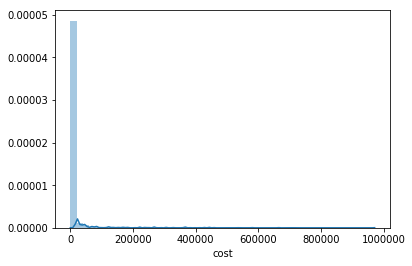

In [ ]:
sns.distplot(df_apple['cost'])

In [ ]:
df_apple['cost'].describe()

count     11367.000000
mean       7024.437758
std       39974.021527
min           0.000000
25%          78.000000
50%         402.000000
75%        1493.000000
max      970761.000000
Name: cost, dtype: float64

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df_apple['cost'].skew())
print("Kurtosis: %f" % df_apple['cost'].kurt())

Skewness: 11.644879
Kurtosis: 175.020677


It is easy to figure out that the response variable is not normally distributed. It is right skewed and has very high standard deviation.

## 3.2. Relationships with numerical predictors

#### Correlation

              Pod Position  Duration  EQ Units      cost
Pod Position      1.000000 -0.060938 -0.060918 -0.061907
Duration         -0.060938  1.000000  1.000000  0.121352
EQ Units         -0.060918  1.000000  1.000000  0.121350
cost             -0.061907  0.121352  0.121350  1.000000


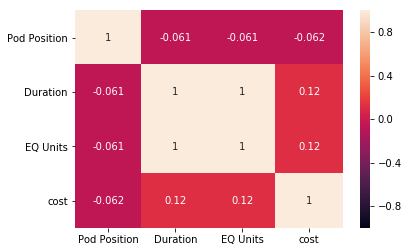

In [ ]:
corr = df_apple.corr()
print(corr)
sns.heatmap(corr, vmin=-1, vmax=1,annot=True,annot_kws={'size': 10})

At the first sight, one relationship got my attention. It was the one refered to the 'Duration' and 'EQ Units'.  Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. 

Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.

Another thing that got my attention was 'cost' correlations. As we can check from the heatmap above, it is hard to find any numerical variable that has strong correlation with 'cost'.

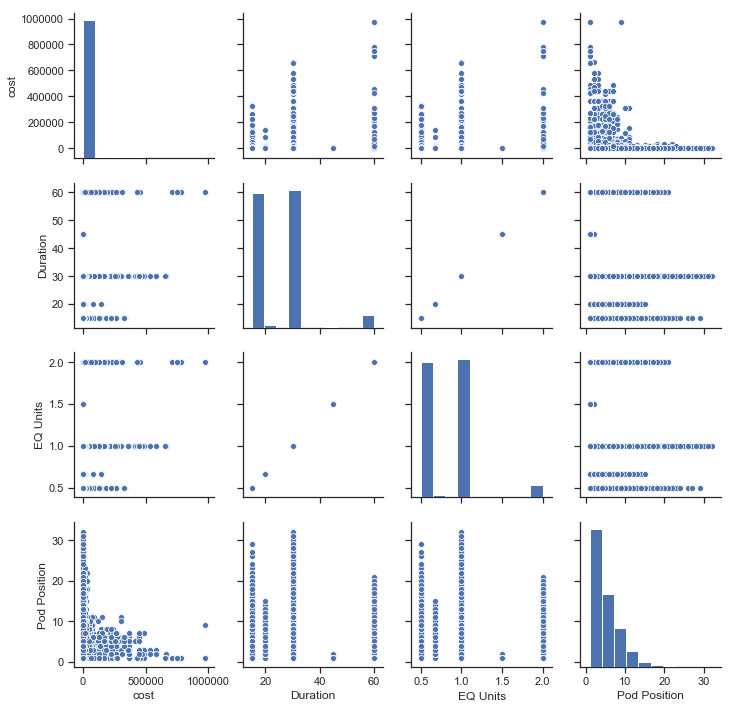

In [ ]:
df = df_apple[['cost','Duration','EQ Units', 'Pod Position']]
sns.set(style = "ticks")
sns.pairplot(df)

Although we already knew that numerical predictor variables are not strongly correlated with the response 'cost', this mega scatter plot gives us a reasonable idea about variables relationships. 

One of the figure we may find interesting is the variable 'Pod Position'. Airings with lower pod position value tends to have high cost.

## 4.3. Relationships with categorical variables

(-0.5, 6.5, 0, 800000)

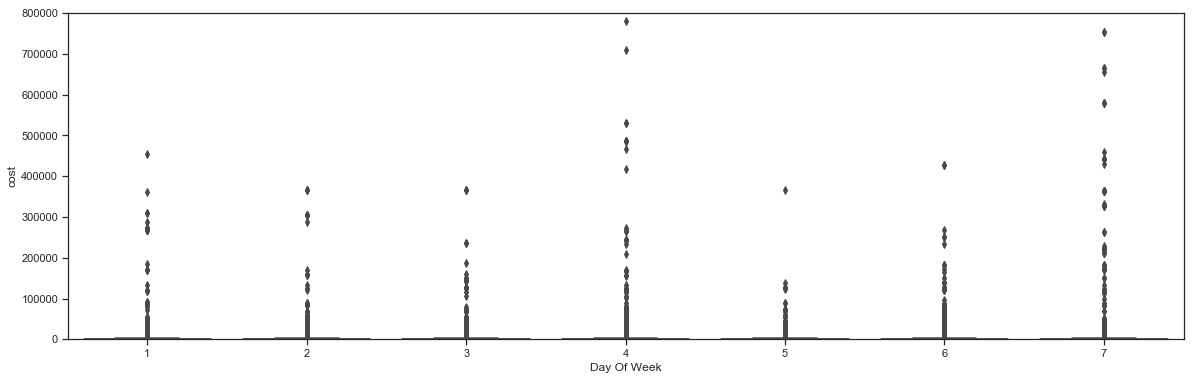

In [ ]:
#box plot Day of Week/cost
var = 'Day Of Week'
data = pd.concat([df_apple['cost'], df_apple[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="cost", data=data)
fig.axis(ymin=0, ymax=800000)

Some airings on Thursday and Sunday are much more expensive than another airings.

(-0.5, 13.5, 0, 800000)

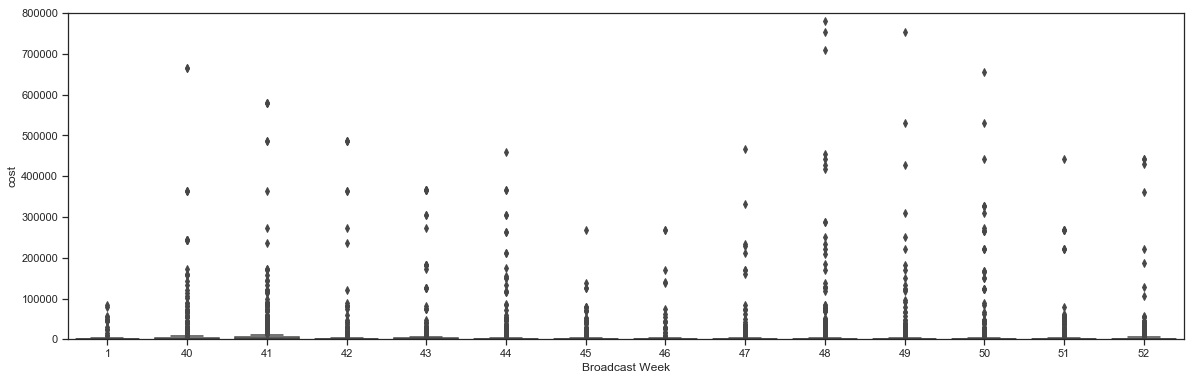

In [ ]:
#box plot Broadcast Week/cost
var = 'Broadcast Week'
data = pd.concat([df_apple['cost'], df_apple[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="cost", data=data)
fig.axis(ymin=0, ymax=800000)

We can find a trend from the plot above. Airing cost is relatively hihg in 40th, 44th, 48th weeks and those weeks are the first week of Sep, Oct, and Nov. So there is a trend that the airing cost is most expensive in the first week and gets lower and lower as weeks ensued.

(-0.5, 106.5, 0, 800000)

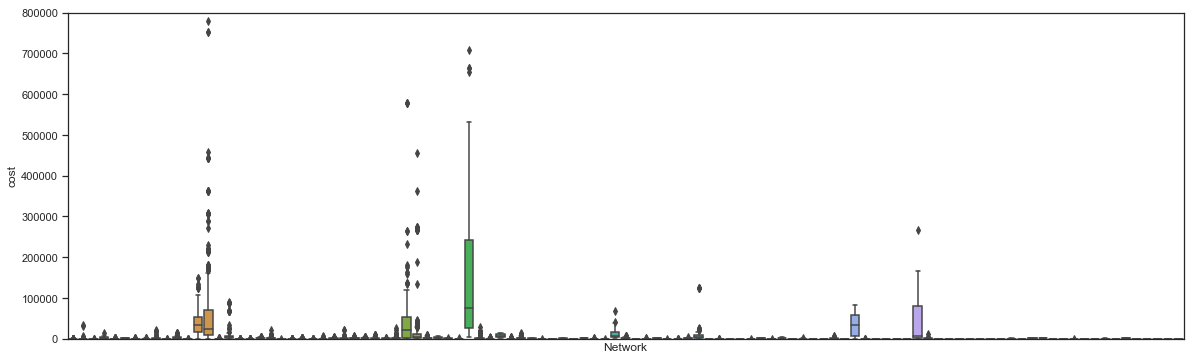

In [ ]:
#box plot Network/cost
var = 'Network'
data = pd.concat([df_apple['cost'], df_apple[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="cost", data=data)
fig.axes.xaxis.set_ticks([])
fig.axis(ymin=0, ymax=800000)

From the chart above, we can find out that airing cost is very high in specific networks.

(-0.5, 1.5, 0, 800000)

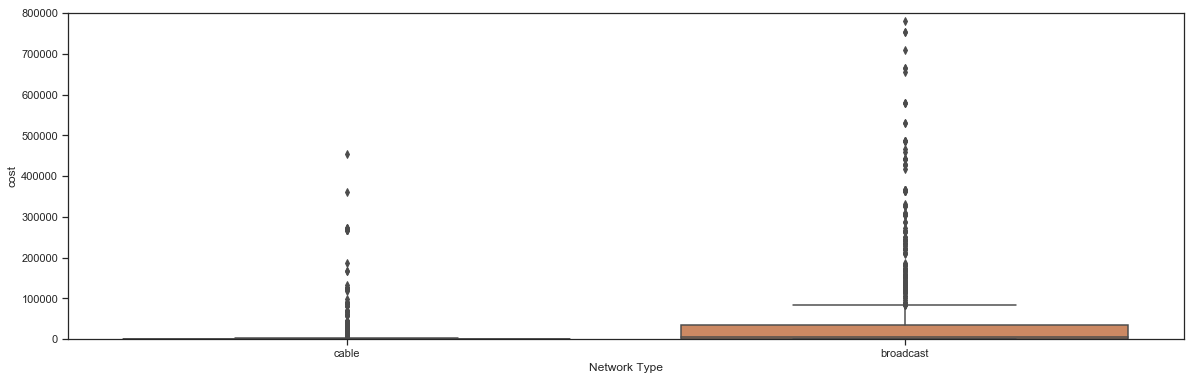

In [ ]:
#box plot Network Type/cost
var = 'Network Type'
data = pd.concat([df_apple['cost'], df_apple[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="cost", data=data)
# fig.axes.xaxis.set_ticks([])
fig.axis(ymin=0, ymax=800000)

Airing cost tends to higher in broadcast network than in cable network.

(-0.5, 8.5, 0, 800000)

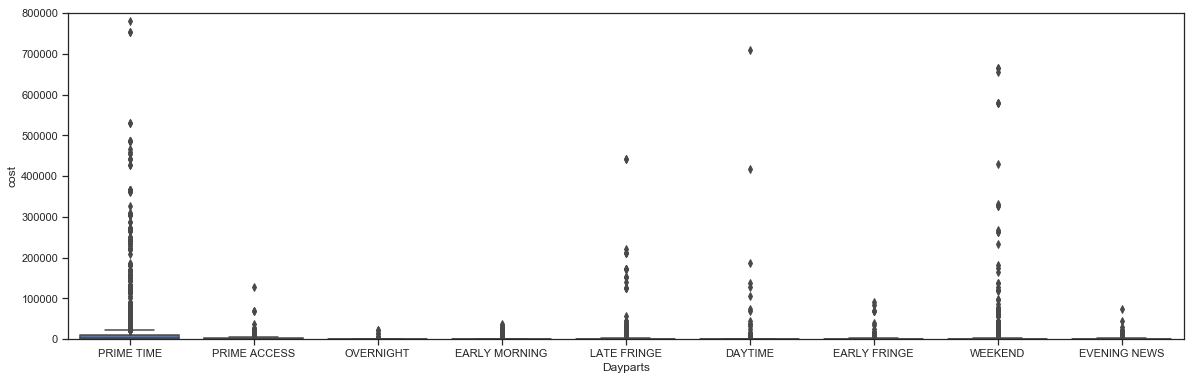

In [ ]:
#box plot Dayparts/cost
var = 'Dayparts'
data = pd.concat([df_apple['cost'], df_apple[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="cost", data=data)
fig.axis(ymin=0, ymax=800000)


 We can figure out which dayparts are expensive for airing from the above chart. As we expected, Apple paied more for Prime Time, Daytime, and Weekend.


In [ ]:
show_freq = {}
for show in df_apple['Show']:
    if show in show_freq:
        show_freq[show]+=1
    else:
        show_freq[show]=1
show_freq        
dic = {k: v for k, v in show_freq.items() if v >50}
freq_show = list(dic.keys())
df_apple_show = df_apple.loc[df_apple['Show'].isin(freq_show)]

(-0.5, 35.5, 0, 800000)

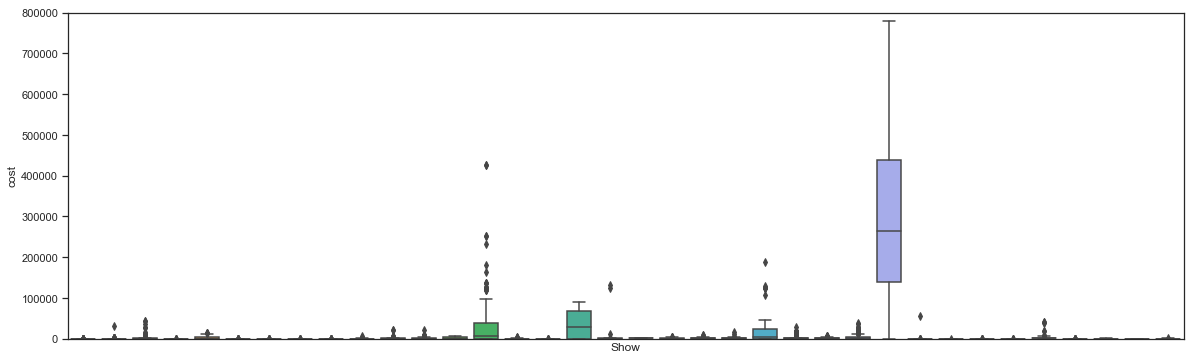

In [ ]:
#box plot Show/cost
var = 'Show'
data = pd.concat([df_apple_show['cost'], df_apple_show[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="cost", data=data)
fig.axes.xaxis.set_ticks([])
fig.axis(ymin=0, ymax=800000)

From the plot above, we can find that Apple should pay a lot for airing in specific shows.

(-0.5, 30.5, 0, 800000)

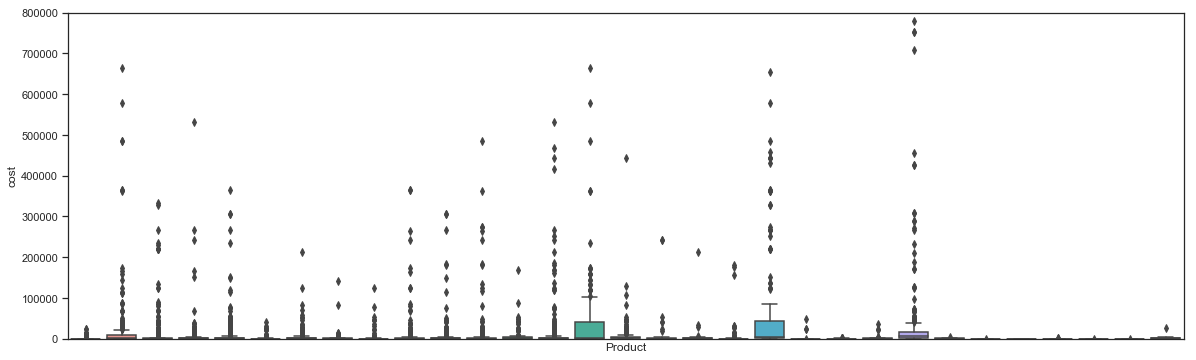

In [ ]:
#box plot Product/cost
var = 'Product'
data = pd.concat([df_apple['cost'], df_apple[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="cost", data=data)
fig.axes.xaxis.set_ticks([])
fig.axis(ymin=0, ymax=800000)

Apple's airing cost varies in different products.

In [ ]:
def cramers_V(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (stat/(obs*mini))

In [ ]:
def cat_corr(df):
    label = preprocessing.LabelEncoder()
    data_encoded = pd.DataFrame() 
    cats = ['cost','Title', 'Product', 'Category','Network','Network Type','Show','Dayparts'
       ,'Broadcast Year','Broadcast Month','Broadcast Week','Day Of Week','Hour Of Day','TimeZone']

    for i in cats :
        data_encoded[i]=label.fit_transform(df[i])
    
    rows= []

    for var1 in data_encoded:
        col = []
        for var2 in data_encoded :
            cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
            col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
        rows.append(col)

    
    cramers_results = np.array(rows)
    df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)
    return df

In [ ]:
cat_corr(df_apple)

,cost,Title,Product,Category,Network,Network Type,Show,Dayparts,Broadcast Year,Broadcast Month,Broadcast Week,Day Of Week,Hour Of Day,TimeZone
cost,1.00,0.34,0.34,0.40,0.28,0.79,0.39,0.37,0.33,0.36,0.34,0.34,0.32,0.01
Title,0.34,1.00,1.00,1.00,0.16,0.12,0.33,0.02,0.11,0.27,0.15,0.01,0.01,0.00
Product,0.34,1.00,1.00,1.00,0.19,0.07,0.39,0.01,0.03,0.23,0.11,0.01,0.01,0.00
Category,0.40,1.00,1.00,1.00,0.27,0.04,0.55,0.01,0.01,0.12,0.08,0.00,0.01,0.00
Network,0.28,0.16,0.19,0.27,1.00,1.00,0.84,0.07,0.03,0.12,0.07,0.03,0.04,1.00
Network Type,0.79,0.12,0.07,0.04,1.00,1.00,0.82,0.07,0.00,0.02,0.02,0.00,0.07,0.00
Show,0.39,0.33,0.39,0.55,0.84,0.82,1.00,0.36,0.41,0.41,0.31,0.30,0.28,1.00
Dayparts,0.37,0.02,0.01,0.01,0.07,0.07,0.36,1.00,0.00,0.01,0.00,0.07,0.76,0.00
Broadcast Year,0.33,0.11,0.03,0.01,0.03,0.00,0.41,0.00,0.99,1.00,1.00,0.02,0.01,0.00
Broadcast Month,0.36,0.27,0.23,0.12,0.12,0.02,0.41,0.01,1.00,1.00,1.00,0.01,0.01,0.00


I encoded categorical variables just to find relationsips between each categorical variable.

I will figure out how to reduce levels in categorical variables in next project.

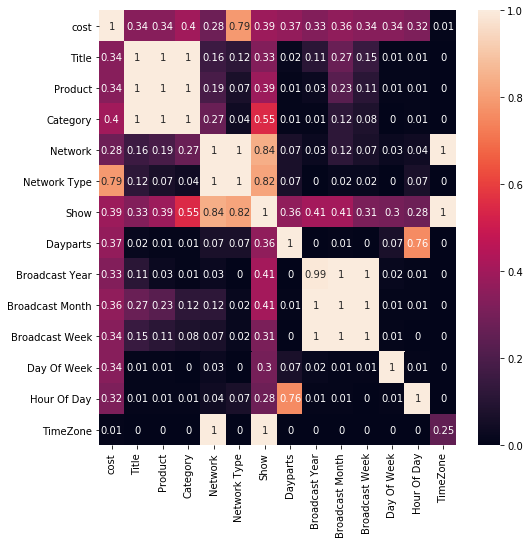

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cat_corr(df_apple), annot=True,annot_kws={'size': 10})

There are several interesting relationships we should take a look. Each of 'Product', 'Title', 'Category' have strong relationships. And also 'Network Type' and 'Network' have strong relationship and so do 'Broadcast Year', 'Broadcast Month', and 'Broadcast Week' as I expected.

To build prediction model using this dataset, I will reduce complexity of categorical variables and use dummy coding and dimension reduction technique.

## Samsung

## 4.1. The response variable ; Cost

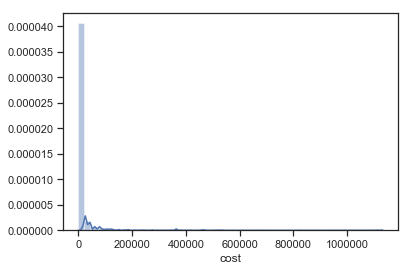

In [ ]:
sns.distplot(df_samsung['cost'])

In [ ]:
df_samsung['cost'].describe()

count    5.444000e+03
mean     8.777982e+03
std      4.032933e+04
min      0.000000e+00
25%      3.650000e+02
50%      8.750000e+02
75%      2.528250e+03
max      1.130473e+06
Name: cost, dtype: float64

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df_samsung['cost'].skew())
print("Kurtosis: %f" % df_samsung['cost'].kurt())

Skewness: 12.318381
Kurtosis: 214.471820


Like Apple, response variable in Samsung data also right skewed and has high standard deviation.

## 4.2. Relationships with numerical predictors

#### Correlation

              Pod Position  Duration  EQ Units      cost
Pod Position      1.000000 -0.136874 -0.136874 -0.108410
Duration         -0.136874  1.000000  1.000000  0.113171
EQ Units         -0.136874  1.000000  1.000000  0.113171
cost             -0.108410  0.113171  0.113171  1.000000


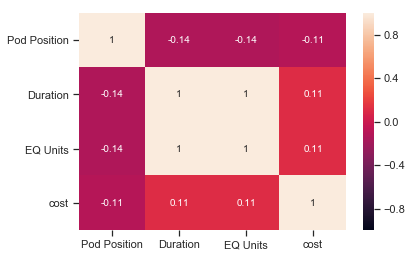

In [ ]:
corr = df_samsung.corr()
print(corr)
sns.heatmap(corr, vmin=-1, vmax=1,annot=True,annot_kws={'size': 10})

'Duration', 'EQ Units' has high correlation and it is hard to find very strong relationships between numerical variables and response variable.

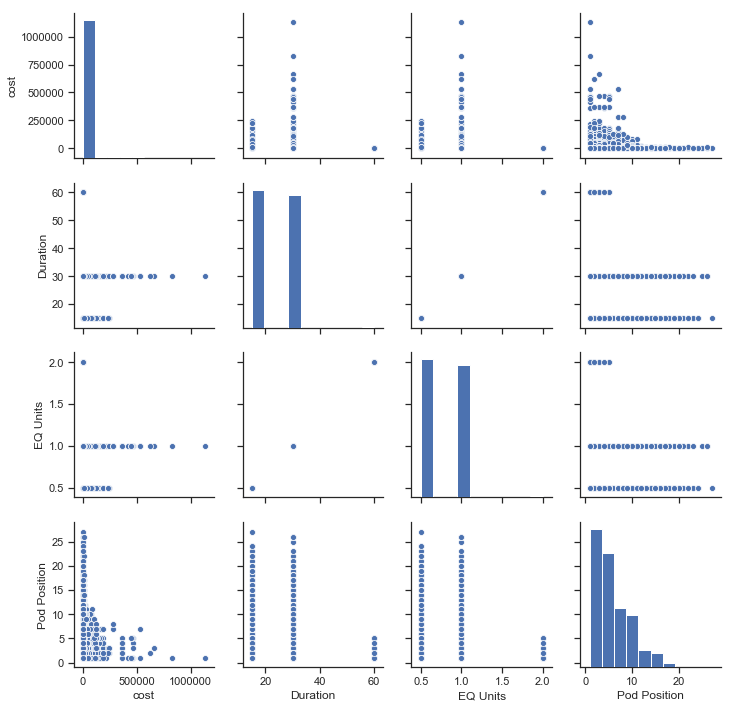

In [ ]:
df = df_samsung[['cost','Duration','EQ Units', 'Pod Position']]
sns.set(style = "ticks")
sns.pairplot(df)

The lower 'Pod Position' the airing has, the higher chance to pay a lot the Samsung has.

## 4.3. Relationships with categorical variables

(-0.5, 6.5, 0, 800000)

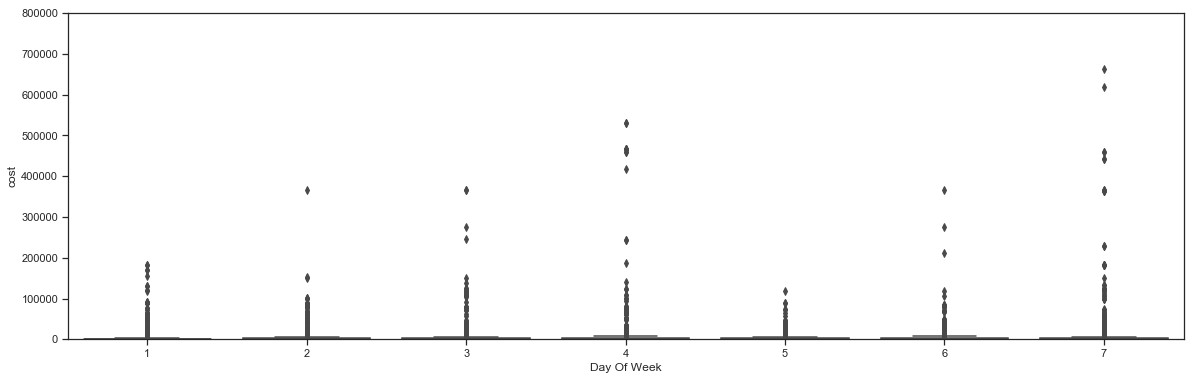

In [ ]:
#box plot Day of Week/cost
var = 'Day Of Week'
data = pd.concat([df_samsung['cost'], df_samsung[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="cost", data=data)
fig.axis(ymin=0, ymax=800000)

Having airings on Thursday and Sunday have higher chance to pay more.

(-0.5, 13.5, 0, 800000)

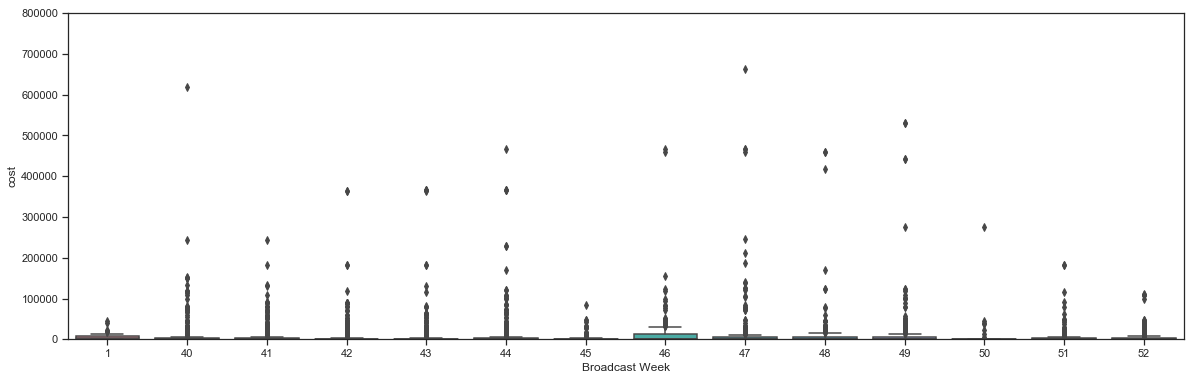

In [ ]:
#box plot Broadcast Week/cost
var = 'Broadcast Week'
data = pd.concat([df_samsung['cost'], df_samsung[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="cost", data=data)
fig.axis(ymin=0, ymax=800000)

Unlike Apple, it is hard to find any trend of airing cost based on 'Broadcast Week'.

(-0.5, 106.5, 0, 800000)

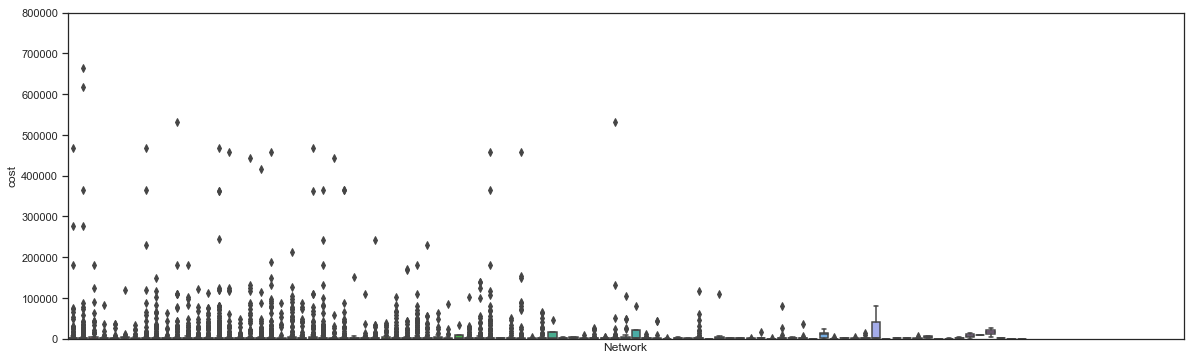

In [ ]:
#box plot Network/cost
var = 'Network'
data = pd.concat([df_samsung['cost'], df_apple[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="cost", data=data)
fig.axes.xaxis.set_ticks([])
fig.axis(ymin=0, ymax=800000)

As compare to Apple, Samsung paid relatively evenly for airing on each network.

(-0.5, 1.5, 0, 800000)

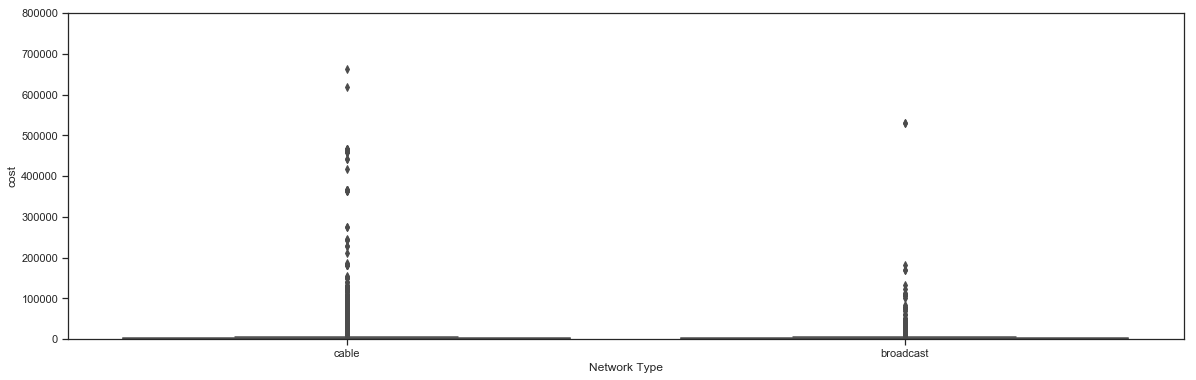

In [ ]:
#box plot Network Type/cost
var = 'Network Type'
data = pd.concat([df_samsung['cost'], df_apple[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="cost", data=data)
# fig.axes.xaxis.set_ticks([])
fig.axis(ymin=0, ymax=800000)

The above plot has interesting result. Unlike data of Apple, Samsung tends to pay more at cable network.

(-0.5, 8.5, 0, 800000)

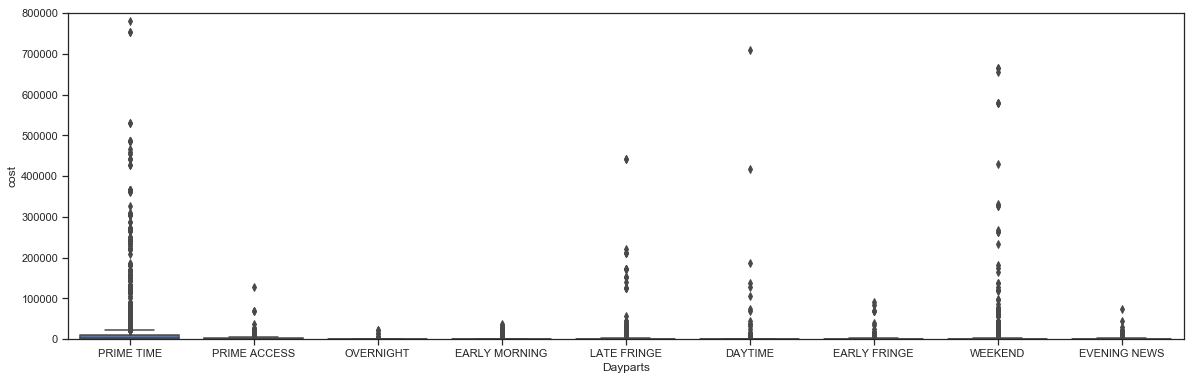

In [ ]:
#box plot Dayparts/cost
var = 'Dayparts'
data = pd.concat([df_apple['cost'], df_apple[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="cost", data=data)
fig.axis(ymin=0, ymax=800000)

The result is similar to the result of Apple's data.

In [ ]:
show_freq = {}
for show in df_samsung['Show']:
    if show in show_freq:
        show_freq[show]+=1
    else:
        show_freq[show]=1
show_freq        
dic = {k: v for k, v in show_freq.items() if v >30}
freq_show = list(dic.keys())
df_samsung_show = df_samsung.loc[df_samsung['Show'].isin(freq_show)]

(-0.5, 32.5, 0, 800000)

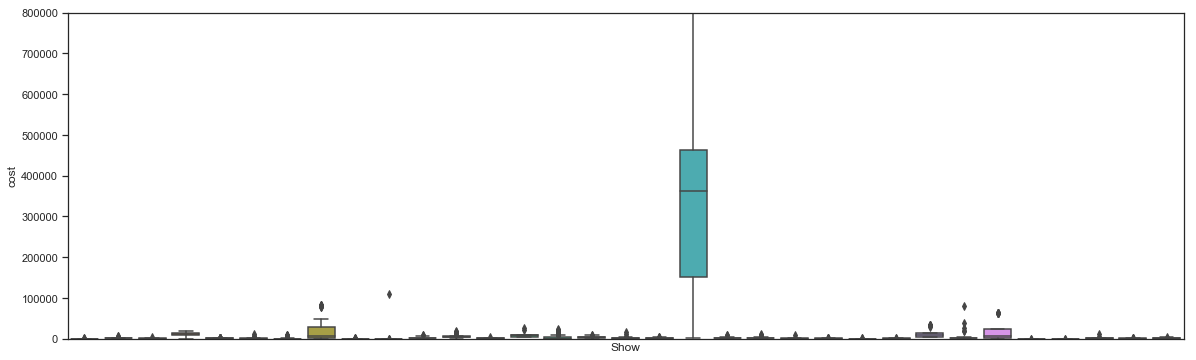

In [ ]:
#box plot Show/cost
var = 'Show'
data = pd.concat([df_samsung_show['cost'], df_samsung_show[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="cost", data=data)
fig.axes.xaxis.set_ticks([])
fig.axis(ymin=0, ymax=800000)

Samsung paid a lot to a specific show.

(-0.5, 14.5, 0, 800000)

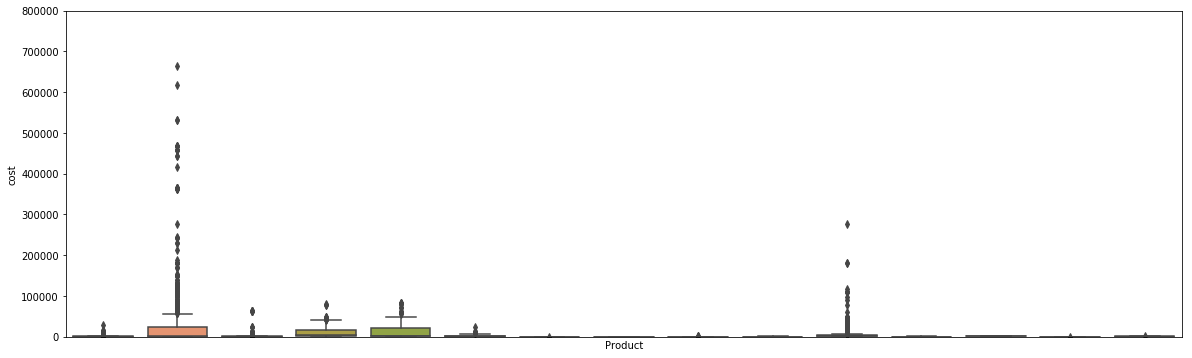

In [ ]:
#box plot Product/cost
var = 'Product'
data = pd.concat([df_samsung['cost'], df_samsung[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="cost", data=data)
fig.axes.xaxis.set_ticks([])
fig.axis(ymin=0, ymax=800000)

From the above plot, we can check the fact that Samsung wanted to focus on putting ad of particular products.

In [ ]:
cat_corr(df_samsung)

,cost,Title,Product,Category,Network,Network Type,Show,Dayparts,Broadcast Year,Broadcast Month,Broadcast Week,Day Of Week,Hour Of Day,TimeZone
cost,1.00,0.54,0.54,0.58,0.56,0.97,0.62,0.57,0.70,0.64,0.57,0.55,0.53,NaN
Title,0.54,1.00,1.00,1.00,0.32,0.38,0.48,0.03,0.07,0.38,0.17,0.02,0.02,NaN
Product,0.54,1.00,1.00,1.00,0.43,0.34,0.58,0.02,0.06,0.31,0.13,0.01,0.02,NaN
Category,0.58,1.00,1.00,1.00,0.47,0.31,0.62,0.02,0.06,0.30,0.21,0.01,0.03,NaN
Network,0.56,0.32,0.43,0.47,1.00,1.00,0.82,0.08,0.05,0.12,0.08,0.03,0.05,NaN
Network Type,0.97,0.38,0.34,0.31,1.00,1.00,0.88,0.16,0.00,0.01,0.05,0.00,0.17,NaN
Show,0.62,0.48,0.58,0.62,0.82,0.88,1.00,0.40,0.23,0.32,0.27,0.36,0.28,NaN
Dayparts,0.57,0.03,0.02,0.02,0.08,0.16,0.40,1.00,0.01,0.01,0.01,0.08,0.76,NaN
Broadcast Year,0.70,0.07,0.06,0.06,0.05,0.00,0.23,0.01,0.97,1.00,1.00,0.02,0.01,NaN
Broadcast Month,0.64,0.38,0.31,0.30,0.12,0.01,0.32,0.01,1.00,1.00,1.00,0.01,0.01,NaN


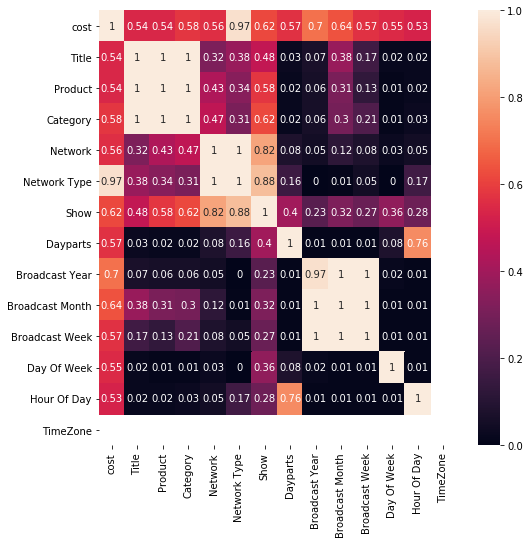

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cat_corr(df_samsung), annot=True,annot_kws={'size': 10})

# 4. Summary

Most of results of EDA from Apple and Samsung were similar although I divided the dataset by two to figure out if there are big difference. From the next project, I will use one dataset containing information of both Apple and Samsung and use the 'Brand' column as another categorical variable.

Since the response variable; cost has very high standard deviation, it was hard to find out outliers. Therefore, in the next project, by tring diverse methods, I will find proper outliers and try both regression prediction model and classification prediction model to build most accurate model.